Binary Classification using a linear neural network with PyTorch

In [1]:
import torch
from torch import nn
from torch.utils import data
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification

We use scikit learn to generate points in 2D

In addition, load_array creates a DataLoader for training

In [65]:
def synthetic_data(num_examples):
    X, Y = make_classification(n_samples=num_examples, n_features=2, n_redundant=0, n_informative=2,
                             n_clusters_per_class=1)
    return X, Y


def load_array(data_arrays, batch_size, is_train=True):
    """Construct a PyTorch data iterator."""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

these are the two training functions; the first one training on a subset of the training data (as provided by train_iter) and the second one calling the first one for num_epoch times.

In [3]:
def train_epoch(net, train_iter, loss, updater):
    """The training loop defined in Chapter 3."""
    # Set the model to training mode
    # if isinstance(net, torch.nn.Module):
    net.train()
    for X, y in train_iter:
        # Compute gradients and update parameters
        y_hat = net(X.float())
        l = loss(y_hat, y)
        # Using PyTorch in-built optimizer & loss criterion
        updater.zero_grad()
        l.backward()
        updater.step()


def train(net, train_iter, loss, num_epochs, updater):
    """Train a model (defined in Chapter 3)."""
    for epoch in range(num_epochs):
        train_epoch(net, train_iter, loss, updater)

In [72]:
# we want to classify a 2-d input into 2 classes
# TODO fix the warning about missing dimension
net = nn.Sequential(nn.Linear(2, 2), nn.Softmax())


def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights);

# our loss function in case of classification
loss = nn.CrossEntropyLoss()


trainer = torch.optim.SGD(net.parameters(), lr=0.1)
# trainer = torch.optim.Adam(net.parameters(), lr=0.001)


batch_size = 10

features, labels = synthetic_data(100)
f = torch.tensor(features)
l = torch.tensor(labels)

data_iter = load_array((f, l), batch_size)


num_epochs = 10
# and actually train the network
train(net, data_iter, loss, num_epochs, trainer)

In [ ]:
# we can take a look at the weights of the NN after training
# net[0].weight

Now we actually use the NN

We will plot one NN output as we move along a line in the 2D area

In [67]:
# let's create a range of elements...
xpred = torch.tensor(np.linspace(-4,4,20))

In [68]:
# stack them together with something constant
inp = torch.stack((xpred, torch.ones_like(xpred)), dim=-1)

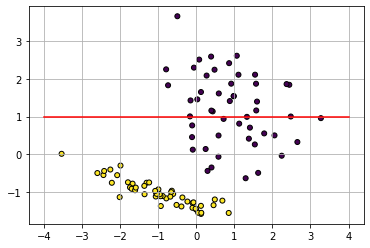

In [73]:
# let's plot the data
plt.scatter(f[:, 0], f[:, 1], marker='o', c=l, s=25, edgecolor='k')
# and the line along we plot the NN output
plt.plot(inp[:, 0], inp[:, 1], c='r')

plt.grid()
plt.show()

In [62]:
# using the NN for "point-wise" prediction
xtest=torch.tensor([0, -2])
net(xtest.float())

/usr/lib/python3.9/site-packages/torch/nn/modules/container.py:119: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


tensor([0.5363, 0.4637], grad_fn=<SoftmaxBackward>)

In [74]:
# input the points on the line into the NN
prob = net(inp.float())

/usr/lib/python3.9/site-packages/torch/nn/modules/container.py:119: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


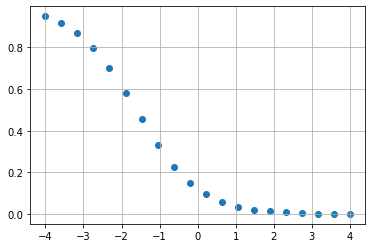

In [75]:
# and plot the corresponding NN output
plt.scatter(xpred,prob[:,1].detach().numpy())
plt.grid(True)